In [50]:
import re
import os, glob
import pandas as pd
import numpy as np
import scipy.stats as st
import pingouin as pg
import matplotlib.pyplot as plt

import seaborn as sns
#import psignifit as ps

In [51]:
plt.rcParams.update({'font.size': 18})
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [52]:
data_path = 'selected/'

In [53]:
summary_a20 = pd.read_csv(os.path.join(data_path, "summary_a20.csv"))
summary_a45 = pd.read_csv(os.path.join(data_path, "summary_a45.csv"))
data_files  = glob.glob(os.path.join(data_path, 'a*'))

In [54]:
summary_a20.head()

,Unnamed: 0,time_taken,finished,stcoh1,stcoh2,acc_part2,handness,browser,resolution,age,birth,sex,residence,employment,language,nationality,student
0,0,44.815283,yes,0.132028,0.263955,83.796,right,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,"1366,728",18.0,Spain,Female,United Kingdom,Unemployed (and job seeking),NaN,Spain,Yes
1,1,33.313283,yes,0.037313,0.081208,79.142,right,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4...,"1280,709",26.0,Lithuania,Male,Spain,Full-Time,Lithuanian,Lithuania,No
2,2,39.373500,yes,0.046708,0.129425,80.242,right,Mozilla/5.0 (X11; CrOS x86_64 13099.110.0) App...,"1366,720",27.0,Denmark,Male,Denmark,Full-Time,Danish,Denmark,No
3,3,31.026067,yes,0.085471,0.128092,80.196,right,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,"1920,1040",18.0,Poland,Male,Poland,Part-Time,Polish,Poland,Yes
4,4,53.065417,yes,0.042722,0.076805,70.884,right,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:80...,"1252,667",38.0,Poland,Male,Poland,Full-Time,Polish,Poland,No


In [55]:
from utils import extract_name_pattern, extract_data_from_part2, \
                  compute_mean_sterr_from_vector, get_avg_conditions_part2, \
                  load_trial_data_part2

In [56]:
from utils import read_part1, read_part2, read_data_practise, read_data_from_2drdk

### Practise analysis

In [57]:
pract_acc_20 = []
pract_acc_45 = []
nr_acc_20 = []
nr_acc_45 = []
for fp in data_files:
    nr_, acc_, angle = read_data_practise(fp)
    if angle == 20:
        pract_acc_20.append(acc_)
        nr_acc_20.append(nr_)
    elif angle == 45:
        pract_acc_45.append(acc_)
        nr_acc_45.append(nr_)
    else:
        raise ValueError('angle not recognised: {}'.format(user_data['angle']))

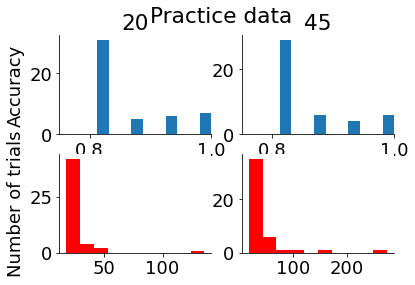

Angle 20
 Mean ACC: 0.86
 Median ACC: 0.81
 Mean NR TRIALS: 24.3
 Median NR TRIALS: 17.0
Angle 45
 Mean ACC: 0.86
 Median ACC: 0.81
 Mean NR TRIALS: 38.4
 Median NR TRIALS: 19.0


In [58]:
plt.subplot(221)
plt.hist(pract_acc_20)
plt.xlim([0.75, 1])
plt.ylabel('Accuracy')
plt.title('20')
plt.subplot(222)
plt.hist(pract_acc_45)
plt.xlim([0.75, 1])
plt.title('45')
plt.subplot(223)
plt.hist(nr_acc_20, color = 'r')
plt.ylabel('Number of trials')
plt.subplot(224)
plt.hist(nr_acc_45, color = 'r')
plt.suptitle('Practice data')
plt.show()

print('Angle 20')
print(' Mean ACC: {:.2f}'.format(np.mean(pract_acc_20)))
print(' Median ACC: {:.2f}'.format(np.median(pract_acc_20)))
print(' Mean NR TRIALS: {:.1f}'.format(np.mean(nr_acc_20)))
print(' Median NR TRIALS: {:.1f}'.format(np.median(nr_acc_20)))
print('Angle 45')
print(' Mean ACC: {:.2f}'.format(np.mean(pract_acc_45)))
print(' Median ACC: {:.2f}'.format(np.median(pract_acc_45)))
print(' Mean NR TRIALS: {:.1f}'.format(np.mean(nr_acc_45)))
print(' Median NR TRIALS: {:.1f}'.format(np.median(nr_acc_45)))


## Load data per angle

In [59]:
subj_20 = []
subj_45 = []
for fp in data_files:
    user_data = read_data_from_2drdk(fp)
    if user_data['angle'] == 20:
        subj_20.append(user_data)
    elif user_data['angle'] == 45:
        subj_45.append(user_data)
    else:
        raise ValueError('angle not recognised: {}'.format(user_data['angle']))

## Group analysis Part 1

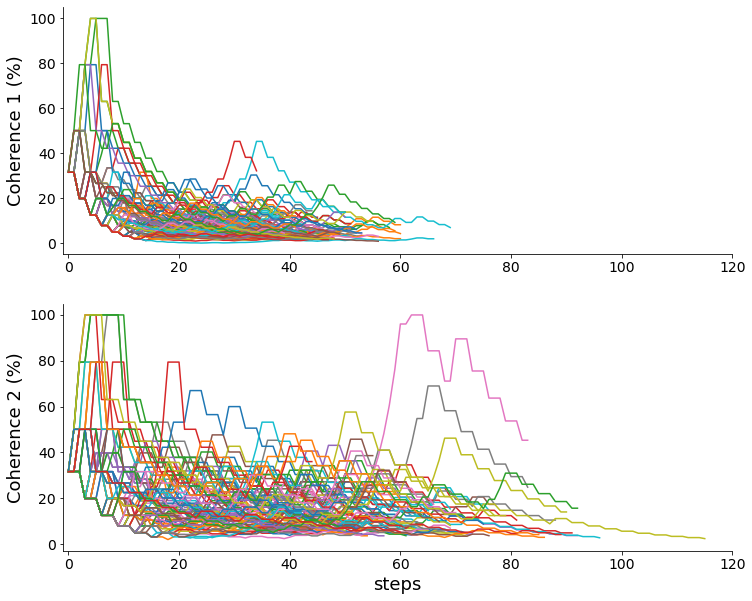

In [60]:
plt.figure(figsize=(12,10))
plt.subplot(211)
for i in range(len(subj_20)):
    plt.plot(range(len(subj_20[i]['part1']['stairs_c1'])), np.array(subj_20[i]['part1']['stairs_c1'])*100)
for i in range(len(subj_45)):
    plt.plot(range(len(subj_45[i]['part1']['stairs_c1'])), np.array(subj_45[i]['part1']['stairs_c1'])*100)
#plt.title('Staircase Coherence 1')
plt.ylabel('Coherence 1 (%)')
plt.xlim([-1, 120])
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.subplot(212)
for i in range(len(subj_20)):
    plt.plot(range(len(subj_20[i]['part1']['stairs_c2'])), np.array(subj_20[i]['part1']['stairs_c2'])*100)
for i in range(len(subj_45)):
    plt.plot(range(len(subj_45[i]['part1']['stairs_c2'])), np.array(subj_45[i]['part1']['stairs_c2'])*100)
#plt.title('Staircase Coherence 2')
plt.xlabel('steps')
plt.ylabel('Coherence 2 (%)')
plt.xlim([-1, 120])
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.savefig('staircase.png')
plt.show()

In [61]:
stairs_coh1_20 = []
stairs_coh2_20 = []
for i in range(len(subj_20)):
    stairs_coh1_20.append(subj_20[i]['part1']['stair_coh1'])
    stairs_coh2_20.append(subj_20[i]['part1']['stair_coh2'])
stairs_coh1_45 = []
stairs_coh2_45 = []
for i in range(len(subj_45)):
    stairs_coh1_45.append(subj_45[i]['part1']['stair_coh1'])
    stairs_coh2_45.append(subj_45[i]['part1']['stair_coh2'])

In [62]:
avg_coh1_20, ste_coh1_20 = compute_mean_sterr_from_vector(stairs_coh1_20)
avg_coh2_20, ste_coh2_20 = compute_mean_sterr_from_vector(stairs_coh2_20)
avg_coh1_45, ste_coh1_45 = compute_mean_sterr_from_vector(stairs_coh1_45)
avg_coh2_45, ste_coh2_45 = compute_mean_sterr_from_vector(stairs_coh2_45)

In [63]:
k2, p = st.normaltest(stairs_coh1_20 + stairs_coh1_45)
print("p_coh1 = {:g}".format(p))
k2, p = st.normaltest(stairs_coh2_20 + stairs_coh2_45)
print("p_coh2 = {:g}".format(p))

k2, p = st.normaltest(stairs_coh1_20)
print("p_coh1_20 = {:g}".format(p))
k2, p = st.normaltest(stairs_coh2_20)
print("p_coh2_20 = {:g}".format(p))

k2, p = st.normaltest(stairs_coh1_45)
print("p_coh1_45 = {:g}".format(p))
k2, p = st.normaltest(stairs_coh2_45)
print("p_coh2_45 = {:g}".format(p))


p_coh1 = 0.000982744
p_coh2 = 1.0265e-05
p_coh1_20 = 0.00246431
p_coh2_20 = 0.052716
p_coh1_45 = 0.103817
p_coh2_45 = 0.0029283


In [64]:
from utils import nonparam_ci

In [65]:
U , p_coh = st.mannwhitneyu(stairs_coh1_20 + stairs_coh1_45, stairs_coh2_20 + stairs_coh2_45)
print('p: ', p_coh)
print('U:', U, 'N:', len(stairs_coh1_20 + stairs_coh1_45))

print('diff', np.median(stairs_coh1_20 + stairs_coh1_45) - np.median(stairs_coh2_20 + stairs_coh2_45))
nonparam_ci(stairs_coh1_20 + stairs_coh1_45, stairs_coh2_20 + stairs_coh2_45)

p:  5.3977284108808915e-15
U: 1534.0 N: 94
diff -0.0766


(-0.09132, -0.05191)

In [66]:
U1 , p_coh1 = st.mannwhitneyu(stairs_coh1_20, stairs_coh1_45)
U2 , p_coh2 = st.mannwhitneyu(stairs_coh2_20, stairs_coh2_45)

In [67]:
print('COH1')
print('p: ', p_coh1)
print('U:', U1, 'N:', len(stairs_coh1_20), len(stairs_coh1_45))
print('diff', np.median(stairs_coh1_20) - np.median(stairs_coh1_45))
print(nonparam_ci(stairs_coh1_20, stairs_coh1_45))
print('COH2')
print('p: ', p_coh2)
print('U:', U2, 'N:', len(stairs_coh2_20), len(stairs_coh2_45))
print('diff', np.median(stairs_coh2_20) - np.median(stairs_coh2_45))
print(nonparam_ci(stairs_coh2_20, stairs_coh2_45))

COH1
p:  0.1838787101564766
U: 983.0 N: 49 45
diff -0.012979999999999992
(-0.026639999999999997, 0.009230000000000002)
COH2
p:  0.1281211457368845
U: 952.0 N: 49 45
diff -0.02779000000000001
(-0.054279999999999995, 0.013039999999999996)


In [68]:
from utils import plot_paired_value_lines, plot_barplot_two_means, plot_paired_barplots,\
                  plot_two_boxplots, plot_two_violin_plots

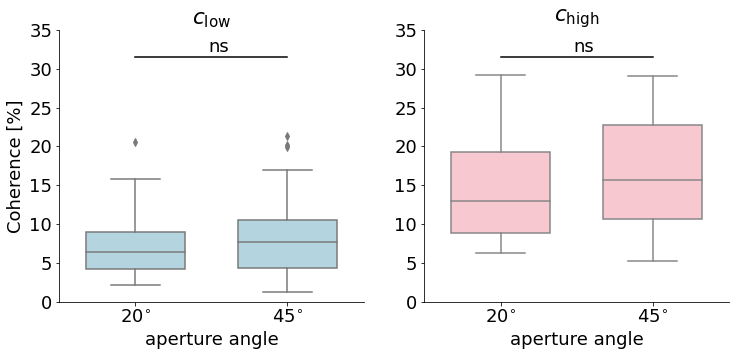

In [69]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_two_boxplots(100*np.array(stairs_coh1_20), 100*np.array(stairs_coh1_45), p_val = p_coh1, name1 = r'$20^{\circ}$', name2 = r'$45^{\circ}$', x_label = 'aperture angle', col = 'lightblue', y_lim = [0,35])
plt.title(r'$c_{\mathrm{low}}$')
plt.ylabel('Coherence [%]')
plt.ylim([0,35])
plt.subplot(122)
plot_two_boxplots(100*np.array(stairs_coh2_20), 100*np.array(stairs_coh2_45), p_val = p_coh1, name1 = r'$20^{\circ}$', name2 = r'$45^{\circ}$', x_label = 'aperture angle', col = 'pink', y_lim = [0,35])
plt.ylabel('')
plt.title(r'$c_{\mathrm{high}}$')
plt.savefig('compcohs_box.png')
plt.show()

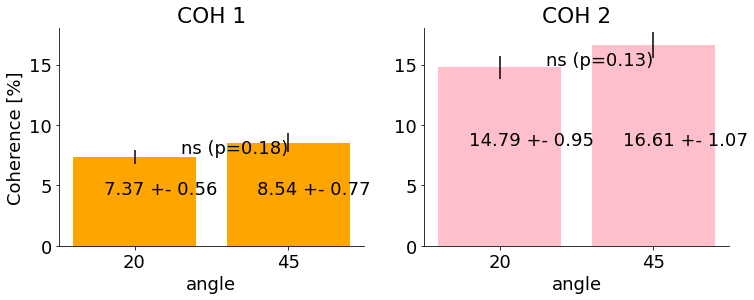

In [70]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plot_barplot_two_means(100*avg_coh1_20, 100*ste_coh1_20, 100*avg_coh1_45, 100*ste_coh1_45, p_val = p_coh1, name1 = 20, name2 = 45, x_label = 'angle', bar_col = 'orange')
plt.title('COH 1')
plt.ylabel('Coherence [%]')
plt.ylim([0,18])
plt.subplot(122)
plot_barplot_two_means(100*avg_coh2_20, 100*ste_coh2_20, 100*avg_coh2_45, 100*ste_coh2_45, p_val = p_coh2, name1 = 20, name2 = 45, x_label = 'angle', bar_col = 'pink')
plt.ylim([0,18])
plt.title('COH 2')
plt.savefig('compcohs.png')
plt.show()

## Group analysis Part 2

### Control condition

In [71]:
control_correct_20 = [subj_20[i]['part2']['corrects']['contr_m'] for i in range(len(subj_20))]
control_correct_45 = [subj_45[i]['part2']['corrects']['contr_m'] for i in range(len(subj_45))]
control_rts_20 = [subj_20[i]['part2']['rts']['contr_m'] for i in range(len(subj_20))]
control_rts_45 = [subj_45[i]['part2']['rts']['contr_m'] for i in range(len(subj_45))]

control_correct_20_s = [subj_20[i]['part2']['corrects']['contr_s'] for i in range(len(subj_20))]
control_correct_45_s = [subj_45[i]['part2']['corrects']['contr_s'] for i in range(len(subj_45))]
control_rts_20_s = [subj_20[i]['part2']['rts']['contr_s'] for i in range(len(subj_20))]
control_rts_45_s = [subj_45[i]['part2']['rts']['contr_s'] for i in range(len(subj_45))]

In [72]:
print('Control, acc [20] = {:.3f} +- {:.3f}'.format(np.mean(control_correct_20), np.mean(control_correct_20_s)))
print('Control, acc [45] = {:.3f} +- {:.3f}'.format(np.mean(control_correct_45), np.mean(control_correct_45_s)))
print('Control, RT [20] = {:.3f} +- {:.3f}'.format(np.mean(control_rts_20), np.mean(control_rts_20_s)))
print('Control, RT [45] = {:.3f} +- {:.3f}'.format(np.mean(control_rts_45), np.mean(control_rts_45_s)))

Control, acc [20] = 0.970 +- 0.017
Control, acc [45] = 0.966 +- 0.019
Control, RT [20] = 842.610 +- 43.299
Control, RT [45] = 872.453 +- 48.901


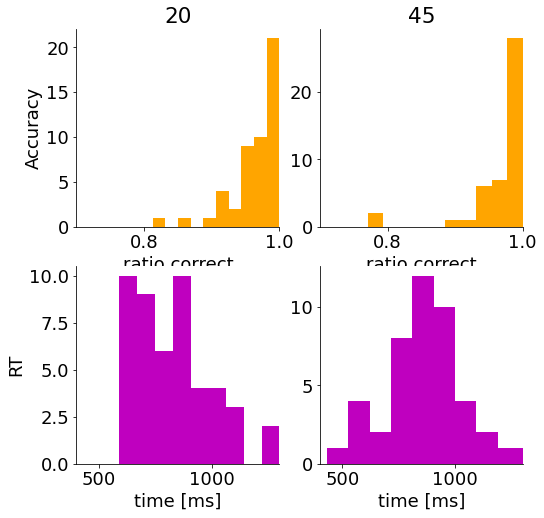

In [73]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.hist(control_correct_20, color = 'orange')
plt.xlim([0.7, 1])
plt.title('20')
plt.ylabel('Accuracy')
plt.xlabel('ratio correct')
plt.subplot(222)
plt.hist(control_correct_45, color = 'orange')
plt.xlim([0.7, 1])
plt.title('45')
plt.xlabel('ratio correct')
plt.subplot(223)
plt.hist(control_rts_20, color = 'm')
plt.xlim([400, 1300])
plt.xlabel('time [ms]')
plt.ylabel('RT')
plt.subplot(224)
plt.hist(control_rts_45, color = 'm')
plt.xlim([400, 1300])
plt.xlabel('time [ms]')
plt.show()

### Accuracies

In [74]:
correct_congr_20, correct_incon_20 = [], []
correct_congr_tr_20, correct_incon_tr_20 = [], []
for i in range(len(subj_20)):
    correct_congr_20.append(subj_20[i]['part2']['corrects']['cong_m'])
    correct_incon_20.append(subj_20[i]['part2']['corrects']['incong_m'])
    correct_congr_tr_20.append(subj_20[i]['part2']['corrects']['cong_true_m'])
    correct_incon_tr_20.append(subj_20[i]['part2']['corrects']['incong_true_m'])
correct_congr_45, correct_incon_45 = [], []
correct_congr_tr_45, correct_incon_tr_45 = [], []
for i in range(len(subj_45)):
    correct_congr_45.append(subj_45[i]['part2']['corrects']['cong_m'])
    correct_incon_45.append(subj_45[i]['part2']['corrects']['incong_m'])
    correct_congr_tr_45.append(subj_45[i]['part2']['corrects']['cong_true_m'])
    correct_incon_tr_45.append(subj_45[i]['part2']['corrects']['incong_true_m'])

In [75]:
t_st_con_20, p_con_20 = st.ttest_rel(correct_congr_20, correct_congr_tr_20)
t_st_inc_20, p_inc_20 = st.ttest_rel(correct_incon_20, correct_incon_tr_20)
t_st_con_45, p_con_45 = st.ttest_rel(correct_congr_45, correct_congr_tr_45)
t_st_inc_45, p_inc_45 = st.ttest_rel(correct_incon_45, correct_incon_tr_45)

In [76]:
avg_cong_20, ste_cong_20 = compute_mean_sterr_from_vector(correct_congr_20)
avg_contr_20, ste_contr_20 = compute_mean_sterr_from_vector(correct_congr_tr_20)

avg_inc_20, ste_inc_20 = compute_mean_sterr_from_vector(correct_incon_20)
avg_inctr_20, ste_inctr_20 = compute_mean_sterr_from_vector(correct_incon_tr_20)

avg_cong_45, ste_cong_45 = compute_mean_sterr_from_vector(correct_congr_45)
avg_contr_45, ste_contr_45 = compute_mean_sterr_from_vector(correct_congr_tr_45)

avg_inc_45, ste_inc_45 = compute_mean_sterr_from_vector(correct_incon_45)
avg_inctr_45, ste_inctr_45 = compute_mean_sterr_from_vector(correct_incon_tr_45)

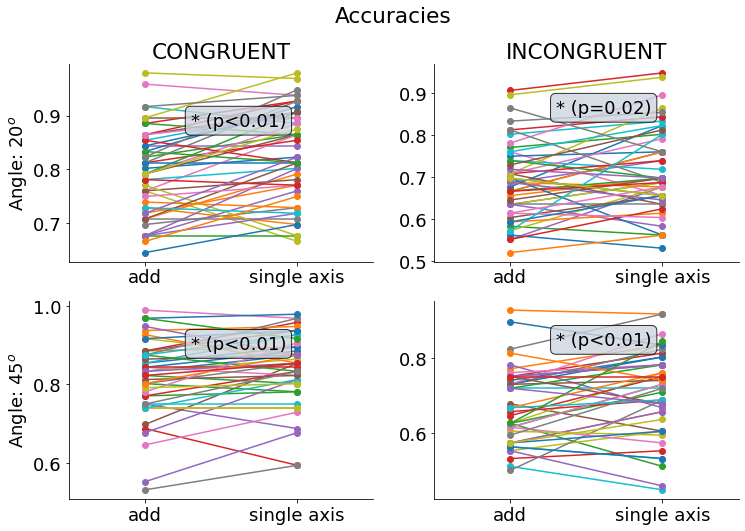

In [77]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plot_paired_value_lines(correct_congr_20, correct_congr_tr_20, p_val = p_con_20, name1 = 'add', name2 = 'single axis', y_label = 'Angle: 20$^o$')
#plot_barplot_two_means(avg_cong_20, ste_cong_20, avg_contr_20, ste_contr_20, p_val = p_con_20, name1 = 'add', name2 = 'single axis', y_label = 'Angle: 20$^o$', bar_col = '#ffda4f')
plt.title('CONGRUENT')
plt.subplot(222)
plot_paired_value_lines(correct_incon_20, correct_incon_tr_20, p_val = p_inc_20, name1 = 'add', name2 = 'single axis')
#plot_barplot_two_means(avg_inc_20, ste_inc_20, avg_inctr_20, ste_inctr_20, p_val = p_inc_20, name1 = 'add', name2 = 'single axis', bar_col = '#dbdcff')
plt.title('INCONGRUENT')
plt.subplot(223)
plot_paired_value_lines(correct_congr_45, correct_congr_tr_45, p_val = p_con_45, name1 = 'add', name2 = 'single axis', y_label = 'Angle: 45$^o$')
#plot_barplot_two_means(avg_cong_45, ste_cong_45, avg_contr_45, ste_contr_45, p_val = p_con_45, name1 = 'add', name2 = 'single axis', y_label = 'Angle: 45$^o$', bar_col = '#ffda4f')
plt.subplot(224)
plot_paired_value_lines(correct_incon_45, correct_incon_tr_45, p_val = p_inc_45, name1 = 'add', name2 = 'single axis')
#plot_barplot_two_means(avg_inc_45, ste_inc_45, avg_inctr_45, ste_inctr_45, p_val = p_inc_45, name1 = 'add', name2 = 'single axis', bar_col = '#dbdcff')
plt.suptitle('Accuracies')
plt.savefig('accuracies.png')
plt.show()

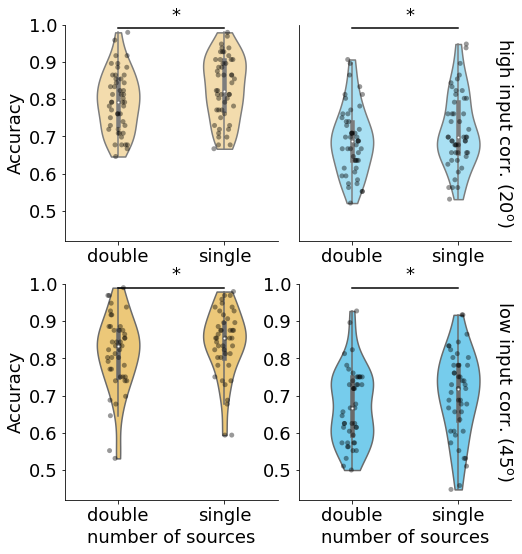

In [78]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(top = 0.95, hspace = 0.2, wspace = 0.1)
plt.subplot(221)
plot_two_violin_plots(correct_congr_20, correct_congr_tr_20, p_val = p_con_20,
                      name1 = 'double', name2 = 'single', y_label = 'Accuracy',
                      col = '#FFE0A1', y_lim = [0.42, 1], lines = 2, x_label = ' ', p_pos = 1.01)
plt.title(' ', fontdict={'size':14})
ax = plt.subplot(222)
plot_two_violin_plots(correct_incon_20, correct_incon_tr_20, p_val = p_inc_20,
                      name1 = 'double', name2 = 'single', y_label = ' ',
                      col = '#9DE6FF', y_lim = [0.42, 1], lines = 2, x_label = ' ', p_pos = 1.01)
plt.yticks([])
ax.yaxis.set_label_position("right")
ax.set_ylabel('high input corr. (20$^\mathrm{o}$)', rotation=270)
plt.title(' ', fontdict={'size':14})
plt.subplot(223)
plot_two_violin_plots(correct_congr_45, correct_congr_tr_45, p_val = p_con_45, p_pos = 1.01,
                      name1 = 'double', name2 = 'single', y_label = 'Accuracy',
                      col = '#FFCF66', y_lim = [0.42, 1], lines = 2, x_label = 'number of sources')
ax = plt.subplot(224)
plot_two_violin_plots(correct_incon_45, correct_incon_tr_45, p_val = p_inc_45, p_pos = 1.01,
                      name1 = 'double', name2 = 'single', y_label = '',
                      col = '#63D5FF', y_lim = [0.42, 1], lines = 2, x_label = 'number of sources')
ax.yaxis.set_label_position("right")
ax.set_ylabel('low input corr. (45$^\mathrm{o}$)', rotation=270)
plt.savefig('accuracies_violin.svg')
plt.show()

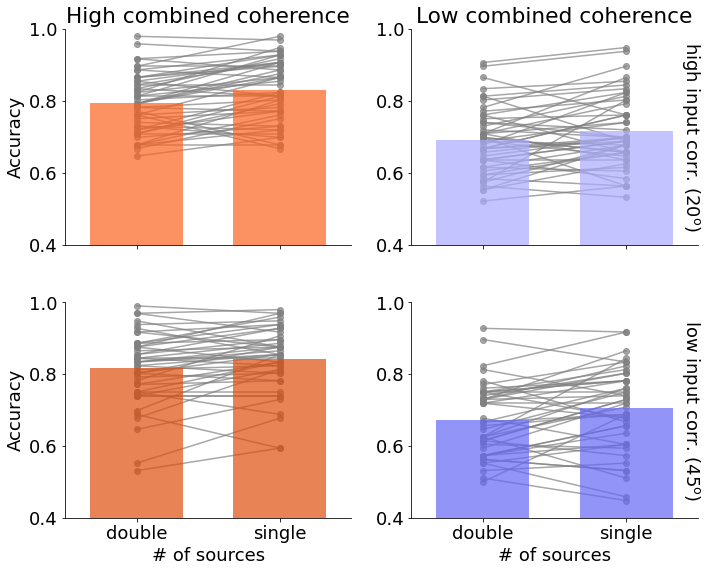

In [80]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plot_paired_barplots(correct_congr_20, correct_congr_tr_20, p_val = None,
                      name1 = '', name2 = '', y_label = 'Accuracy',
                      bar_col = '#fb6220', y_lim = [0.4, 1], x_label = ' ', p_pos=1.01)
plt.title('High combined coherence')
ax = plt.subplot(222)
plot_paired_barplots(correct_incon_20, correct_incon_tr_20, p_val = None,
                      name1 = '', name2 = '', y_label = ' ',
                      bar_col = '#aaacff', y_lim = [0.4, 1], x_label = ' ', p_pos=1.01)
ax.yaxis.set_label_position("right")
ax.set_ylabel('high input corr. (20$^\mathrm{o}$)', rotation=270)
plt.title('Low combined coherence')
plt.subplot(223)
plot_paired_barplots(correct_congr_45, correct_congr_tr_45, p_val = None,
                      name1 = 'double', name2 = 'single', y_label = 'Accuracy',
                      bar_col = '#df4e0f', y_lim = [0.4, 1], x_label = '# of sources', p_pos=1.01)
ax = plt.subplot(224)
plot_paired_barplots(correct_incon_45, correct_incon_tr_45, p_val = None,
                      name1 = 'double', name2 = 'single', y_label = ' ',
                      bar_col = '#6467f6', y_lim = [0.4, 1], x_label = '# of sources', p_pos=1.01)
ax.yaxis.set_label_position("right")
ax.set_ylabel('low input corr. (45$^\mathrm{o}$)', rotation=270)
plt.tight_layout(h_pad=1.2, pad = 0.5)
plt.savefig('accuracies_bars.svg')
plt.show()

<BarContainer object of 1 artists>

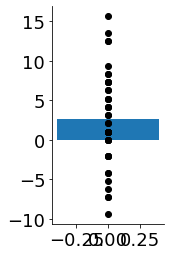

In [81]:
plt.figure(figsize=(2,4))
for diff in (np.array(correct_congr_tr_45)-np.array(correct_congr_45)):
    plt.plot([0], diff*100, 'ko')
    
plt.bar([0], (np.mean(correct_congr_tr_45)-np.mean(correct_congr_45))*100)

In [82]:
t_st_con, p_con = st.ttest_ind(correct_congr_20, correct_congr_45)
t_st_inc, p_inc = st.ttest_ind(correct_incon_20, correct_incon_45)
t_st_con_t, p_con_t = st.ttest_ind(correct_congr_tr_20, correct_congr_tr_45)
t_st_inc_t, p_inc_t = st.ttest_ind(correct_incon_tr_20, correct_incon_tr_45)

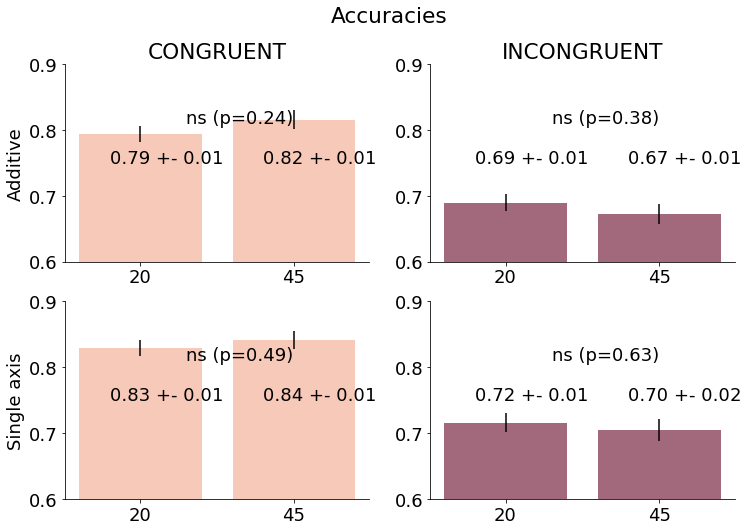

In [83]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plot_barplot_two_means(avg_cong_20, ste_cong_20, avg_cong_45, ste_cong_45, p_val = p_con, name1 = '20', name2 = '45', y_label = 'Additive', bar_col = '#f6c9b9', y_lim = (0.6, 0.9))
plt.title('CONGRUENT')
plt.subplot(222)
plot_barplot_two_means(avg_inc_20, ste_inc_20, avg_inc_45, ste_inc_45, p_val = p_inc, name1 = '20', name2 = '45', bar_col = '#a2697d', y_lim = (0.6, 0.9))
plt.title('INCONGRUENT')
plt.subplot(223)
plot_barplot_two_means(avg_contr_20, ste_contr_20, avg_contr_45, ste_contr_45, p_val = p_con_t, name1 = '20', name2 = '45', y_label = 'Single axis', bar_col = '#f6c9b9', y_lim = (0.6, 0.9))
plt.subplot(224)
plot_barplot_two_means(avg_inctr_20, ste_inctr_20, avg_inctr_45, ste_inctr_45, p_val = p_inc_t, name1 = '20', name2 = '45', bar_col = '#a2697d', y_lim = (0.6, 0.9))
plt.suptitle('Accuracies')
plt.savefig('accuracies_angles.png')
plt.show()

In [84]:
from statsmodels.stats.anova import AnovaRM

In [85]:
df_anova20 = pd.DataFrame(
    {'pid': np.tile(np.tile(np.arange(len(correct_congr_20)), 2), 2),
    'axis': np.concatenate((np.zeros(len(correct_congr_20)), np.ones(len(correct_congr_tr_20)), np.zeros(len(correct_incon_20)), np.ones(len(correct_incon_tr_20)))),
    'congr': np.concatenate((np.zeros(len(correct_congr_20)+len(correct_congr_tr_20)), np.ones(len(correct_incon_20)+len(correct_incon_tr_20)))),
    'correct': np.concatenate((correct_congr_20, correct_congr_tr_20, correct_incon_20, correct_incon_tr_20)) })

In [86]:
print('Angle: 20 (acc)')
print(AnovaRM(data = df_anova20, depvar='correct', subject='pid', within=['axis', 'congr']).fit())

Angle: 20 (acc)
                  Anova
           F Value  Num DF  Den DF Pr > F
-----------------------------------------
axis        31.5188 1.0000 48.0000 0.0000
congr      165.3793 1.0000 48.0000 0.0000
axis:congr   0.3904 1.0000 48.0000 0.5350



In [87]:
df_anova45 = pd.DataFrame(
    {'pid': np.tile(np.tile(np.arange(len(correct_congr_45)), 2), 2),
    'axis': np.concatenate((np.zeros(len(correct_congr_45)), np.ones(len(correct_congr_tr_45)), np.zeros(len(correct_incon_45)), np.ones(len(correct_incon_tr_45)))),
    'congr': np.concatenate((np.zeros(len(correct_congr_45)+len(correct_congr_tr_45)), np.ones(len(correct_incon_45)+len(correct_incon_tr_45)))),
    'correct': np.concatenate((correct_congr_45, correct_congr_tr_45, correct_incon_45, correct_incon_tr_45)) })
print('Angle: 45 (acc)')
print(AnovaRM(data = df_anova45, depvar='correct', subject='pid', within=['axis', 'congr']).fit())

Angle: 45 (acc)
                  Anova
           F Value  Num DF  Den DF Pr > F
-----------------------------------------
axis        18.2368 1.0000 44.0000 0.0001
congr      118.4301 1.0000 44.0000 0.0000
axis:congr   0.2089 1.0000 44.0000 0.6499



In [88]:
posthocs = pg.pairwise_ttests(data = df_anova20, dv='correct', subject='pid', within=['axis', 'congr'])
posthocs

,Contrast,axis,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,axis,-,0,1,True,True,-5.614156,48.0,two-sided,9.686118e-07,1.694e+04,-0.376222
1,congr,-,0,1,True,True,12.859989,48.0,two-sided,3.647875e-17,1.598e+14,1.288534
2,axis * congr,0,0,1,True,True,9.740308,48.0,two-sided,5.951275e-13,1.373e+10,1.198403
3,axis * congr,1,0,1,True,True,9.714229,48.0,two-sided,6.487224e-13,1.264e+10,1.210478


In [89]:
posthocs = pg.pairwise_ttests(data = df_anova45, dv='correct', subject='pid', within=['axis', 'congr'])
posthocs

,Contrast,axis,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,axis,-,0,1,True,True,-4.270462,44.0,two-sided,1.025076e-04,230.696,-0.327295
1,congr,-,0,1,True,True,10.882562,44.0,two-sided,4.615285e-14,1.601e+11,1.450078
2,axis * congr,0,0,1,True,True,9.503314,44.0,two-sided,3.139097e-12,2.779e+09,1.419542
3,axis * congr,1,0,1,True,True,9.230052,44.0,two-sided,7.448158e-12,1.214e+09,1.312376


In [90]:
df_anova45.pid = df_anova45.pid + max(df_anova20.pid)+1
df_anova_all = pd.concat((df_anova20, df_anova45))
df_anova_all['angle'] = [20]*df_anova20.shape[0] + [45]*df_anova45.shape[0]

In [91]:
jaspdf = {'pid': list(range(len(correct_congr_20) + len(correct_congr_45))),
 'cong_2':correct_congr_20 + correct_congr_45,
 'cong_1':correct_congr_tr_20 + correct_congr_tr_45,
 'inc_2':correct_incon_20 + correct_incon_45,
 'inc_1':correct_incon_tr_20 + correct_incon_tr_45,
 'angle':len(correct_congr_20)*[20]+len(correct_congr_45)*[45]}
jaspdf = pd.DataFrame(jaspdf)
jaspdf.to_csv("acc_jasp.csv")

### RTs

In [92]:
rt_congr_20, rt_incon_20 = [], []
rt_congr_tr_20, rt_incon_tr_20 = [], []
for i in range(len(subj_20)):
    rt_congr_20.append(subj_20[i]['part2']['rts']['cong_m'])
    rt_incon_20.append(subj_20[i]['part2']['rts']['incong_m'])
    rt_congr_tr_20.append(subj_20[i]['part2']['rts']['cong_true_m'])
    rt_incon_tr_20.append(subj_20[i]['part2']['rts']['incong_true_m'])
rt_congr_45, rt_incon_45 = [], []
rt_congr_tr_45, rt_incon_tr_45 = [], []
for i in range(len(subj_45)):
    rt_congr_45.append(subj_45[i]['part2']['rts']['cong_m'])
    rt_incon_45.append(subj_45[i]['part2']['rts']['incong_m'])
    rt_congr_tr_45.append(subj_20[i]['part2']['rts']['cong_true_m'])
    rt_incon_tr_45.append(subj_20[i]['part2']['rts']['incong_true_m'])

In [93]:
t_st_con_20, p_con_20 = st.ttest_rel(rt_congr_20, rt_congr_tr_20)
t_st_inc_20, p_inc_20 = st.ttest_rel(rt_incon_20, rt_incon_tr_20)
t_st_con_45, p_con_45 = st.ttest_rel(rt_congr_45, rt_congr_tr_45)
t_st_inc_45, p_inc_45 = st.ttest_rel(rt_incon_45, rt_incon_tr_45)

In [94]:
avg_cong_20, ste_cong_20 = compute_mean_sterr_from_vector(rt_congr_20)
avg_contr_20, ste_contr_20 = compute_mean_sterr_from_vector(rt_congr_tr_20)

avg_inc_20, ste_inc_20 = compute_mean_sterr_from_vector(rt_incon_20)
avg_inctr_20, ste_inctr_20 = compute_mean_sterr_from_vector(rt_incon_tr_20)

avg_cong_45, ste_cong_45 = compute_mean_sterr_from_vector(rt_congr_45)
avg_contr_45, ste_contr_45 = compute_mean_sterr_from_vector(rt_congr_tr_45)

avg_inc_45, ste_inc_45 = compute_mean_sterr_from_vector(rt_incon_45)
avg_inctr_45, ste_inctr_45 = compute_mean_sterr_from_vector(rt_incon_tr_45)

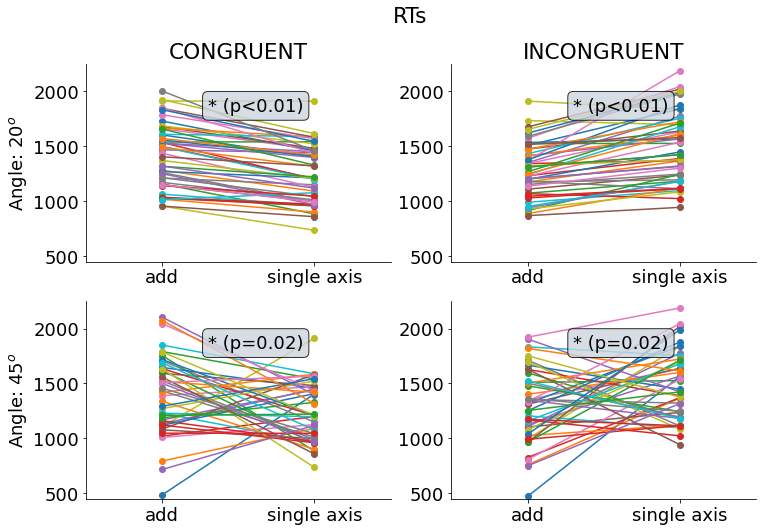

In [95]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plot_paired_value_lines(rt_congr_20, rt_congr_tr_20, p_val = p_con_20, name1 = 'add', name2 = 'single axis', y_lim = [450, 2250], y_label = 'Angle: 20$^o$')
#plot_barplot_two_means(avg_cong_20, ste_cong_20, avg_contr_20, ste_contr_20, p_val = p_con_20, name1 = 'add', name2 = 'single axis', y_label = 'Angle: 20$^o$', bar_col = '#ffda4f')
plt.title('CONGRUENT')
plt.subplot(222)
plot_paired_value_lines(rt_incon_20, rt_incon_tr_20, p_val = p_inc_20, name1 = 'add', name2 = 'single axis', y_lim = [450, 2250])
#plot_barplot_two_means(avg_inc_20, ste_inc_20, avg_inctr_20, ste_inctr_20, p_val = p_inc_20, name1 = 'add', name2 = 'single axis', bar_col = '#dbdcff')
plt.title('INCONGRUENT')
plt.subplot(223)
plot_paired_value_lines(rt_congr_45, rt_congr_tr_45, p_val = p_con_45, name1 = 'add', name2 = 'single axis', y_lim = [450, 2250], y_label = 'Angle: 45$^o$')
#plot_barplot_two_means(avg_cong_45, ste_cong_45, avg_contr_45, ste_contr_45, p_val = p_con_45, name1 = 'add', name2 = 'single axis', y_label = 'Angle: 45$^o$', bar_col = '#ffda4f')
plt.subplot(224)
plot_paired_value_lines(rt_incon_45, rt_incon_tr_45, p_val = p_inc_45, name1 = 'add', name2 = 'single axis',  y_lim = [450, 2250])
#plot_barplot_two_means(avg_inc_45, ste_inc_45, avg_inctr_45, ste_inctr_45, p_val = p_inc_45, name1 = 'add', name2 = 'single axis', bar_col = '#dbdcff')
plt.suptitle('RTs')
plt.savefig('rts.png')
plt.show()

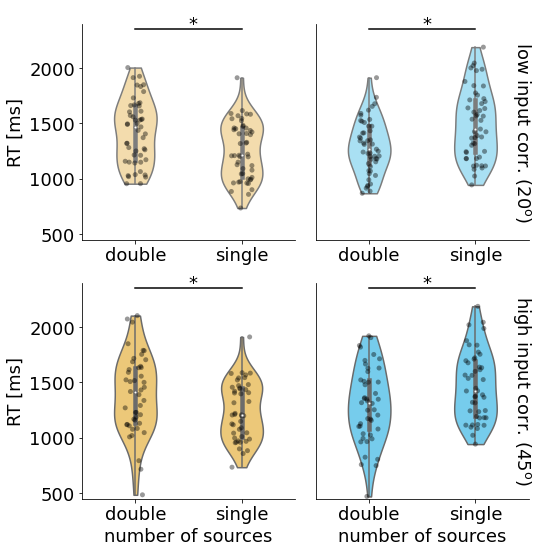

In [96]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(top = 0.95, hspace = 0.2, wspace = 0.1)
plt.subplot(221)
plot_two_violin_plots(rt_congr_20, rt_congr_tr_20, p_val = p_con_20,
                      name1 = 'double', name2 = 'single', y_label = 'RT [ms]',
                      col = '#FFE0A1', y_lim = (450, 2400), lines = 2, x_label = ' ', p_pos = 2350)
plt.title(' ', fontdict={'size':14})
ax = plt.subplot(222)
plot_two_violin_plots(rt_incon_20, rt_incon_tr_20, p_val = p_inc_20,
                      name1 = 'double', name2 = 'single', y_label = ' ',
                      col = '#9DE6FF', y_lim = (450, 2400), lines = 2, x_label = ' ', p_pos = 2350)
ax.yaxis.set_label_position("right")
ax.set_ylabel('low input corr. (20$^\mathrm{o}$)', rotation=270)
plt.yticks([])
plt.title(' ', fontdict={'size':14})
plt.subplot(223)
plot_two_violin_plots(rt_congr_45, rt_congr_tr_45, p_val = p_con_45, p_pos = 2350,
                      name1 = 'double', name2 = 'single', y_label = 'RT [ms]',
                      col = '#FFCF66', y_lim = (450, 2400), lines = 2, x_label = 'number of sources')
ax = plt.subplot(224)
plot_two_violin_plots(rt_incon_45, rt_incon_tr_45, p_val = p_inc_45, p_pos = 2350,
                      name1 = 'double', name2 = 'single', y_label = ' ',
                      col = '#63D5FF', y_lim = (450, 2400), lines = 2, x_label = 'number of sources')
ax.yaxis.set_label_position("right")
ax.set_ylabel('high input corr. (45$^\mathrm{o}$)', rotation=270)
plt.yticks([])
plt.savefig('rts_violin.svg')
plt.show()

In [97]:
t_st_con, p_con = st.ttest_ind(rt_congr_20, rt_congr_45)
t_st_inc, p_inc = st.ttest_ind(rt_incon_20, rt_incon_45)
t_st_con_t, p_con_t = st.ttest_ind(rt_congr_tr_20, rt_congr_tr_45)
t_st_inc_t, p_inc_t = st.ttest_ind(rt_incon_tr_20, rt_incon_tr_45)

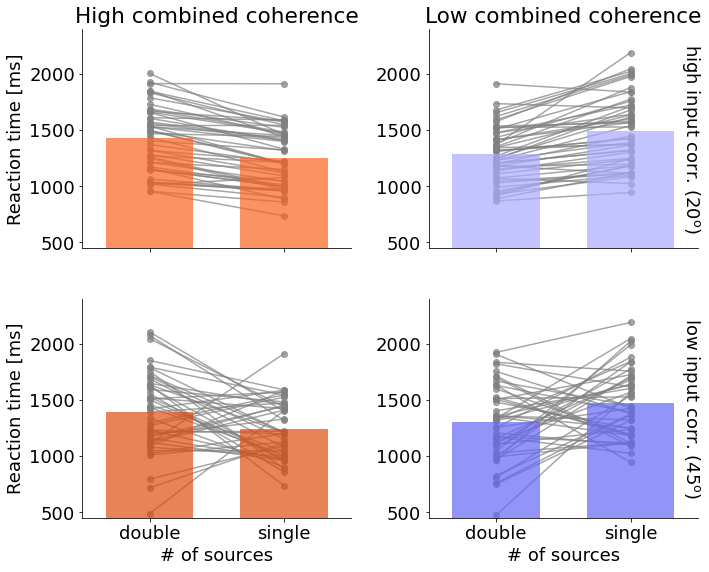

In [98]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plot_paired_barplots(rt_congr_20, rt_congr_tr_20, p_val = None,
                      name1 = '', name2 = '', y_label = 'Reaction time [ms]',
                      bar_col = '#fb6220', y_lim = (450, 2400), x_label = ' ', p_pos=1.01)
plt.title('High combined coherence')
ax = plt.subplot(222)
plot_paired_barplots(rt_incon_20, rt_incon_tr_20, p_val = None,
                      name1 = '', name2 = '', y_label = ' ',
                      bar_col = '#aaacff', y_lim = (450, 2400), x_label = ' ', p_pos=1.01)
ax.yaxis.set_label_position("right")
ax.set_ylabel('high input corr. (20$^\mathrm{o}$)', rotation=270)
plt.title('Low combined coherence')
plt.subplot(223)
plot_paired_barplots(rt_congr_45, rt_congr_tr_45, p_val = None,
                      name1 = 'double', name2 = 'single', y_label = 'Reaction time [ms]',
                      bar_col = '#df4e0f', y_lim = (450, 2400), x_label = '# of sources', p_pos=1.01)
ax = plt.subplot(224)
plot_paired_barplots(rt_incon_45, rt_incon_tr_45, p_val = None,
                      name1 = 'double', name2 = 'single', y_label = ' ',
                      bar_col = '#6467f6', y_lim = (450, 2400), x_label = '# of sources', p_pos=1.01)
ax.yaxis.set_label_position("right")
ax.set_ylabel('low input corr. (45$^\mathrm{o}$)', rotation=270)
plt.tight_layout(h_pad=1.2, pad = 0.5)
plt.savefig('rt_bars.svg')
plt.show()

In [51]:
df_anova20 = pd.DataFrame(
    {'pid': np.tile(np.tile(np.arange(len(rt_congr_20)), 2), 2),
    'axis': np.concatenate((np.zeros(len(rt_congr_20)), np.ones(len(rt_congr_tr_20)), np.zeros(len(rt_incon_20)), np.ones(len(rt_incon_tr_20)))),
    'congr': np.concatenate((np.zeros(len(rt_congr_20)+len(rt_congr_tr_20)), np.ones(len(rt_incon_20)+len(rt_incon_tr_20)))),
    'rt': np.concatenate((rt_congr_20, rt_congr_tr_20, rt_incon_20, rt_incon_tr_20)) })

In [52]:
print('Angle: 20 (RT)')
avo = pg.rm_anova(data = df_anova20, dv='rt', subject='pid', within=['axis', 'congr'])
avo.round(4)

Angle: 20 (RT)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,axis,1.082404e+04,1,48,1.082404e+04,1.6898,0.1998,0.1998,0.0340,1.0
1,congr,1.379464e+05,1,48,1.379464e+05,27.3094,0.0000,0.0000,0.3626,1.0
2,axis * congr,1.744742e+06,1,48,1.744742e+06,109.9858,0.0000,0.0000,0.6962,1.0


In [53]:
df_anova45 = pd.DataFrame(
    {'pid': np.tile(np.tile(np.arange(len(rt_congr_45)), 2), 2),
    'axis': np.concatenate((np.zeros(len(rt_congr_45)), np.ones(len(rt_congr_tr_45)), np.zeros(len(rt_incon_45)), np.ones(len(rt_incon_tr_45)))),
    'congr': np.concatenate((np.zeros(len(rt_congr_45)+len(rt_congr_tr_45)), np.ones(len(rt_incon_45)+len(rt_incon_tr_45)))),
    'rt': np.concatenate((rt_congr_45, rt_congr_tr_45, rt_incon_45, rt_incon_tr_45)) })
print('Angle: 45 (RT)')
avo = pg.rm_anova(data = df_anova45, dv='rt', subject='pid', within=['axis', 'congr'])
avo.round(4)

Angle: 45 (RT)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,axis,3.902705e+03,1,44,3.902705e+03,0.0201,0.888,0.888,0.0005,1.0
1,congr,2.220324e+05,1,44,2.220324e+05,26.5131,0.000,0.000,0.3760,1.0
2,axis * congr,1.157919e+06,1,44,1.157919e+06,101.7447,0.000,0.000,0.6981,1.0


In [54]:
# do posthoc test on interaction

In [55]:
posthocs = pg.pairwise_ttests(data = df_anova20, dv='rt', subject='pid', within=['axis', 'congr'])
posthocs#pg.print_table(posthocs, tablefmt='simple')

,Contrast,axis,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,axis,-,0,1,True,True,-1.299927,48.0,two-sided,1.998338e-01,0.342,-0.055128
1,congr,-,0,1,True,True,-5.225842,48.0,two-sided,3.720286e-06,4821.301,-0.197270
2,axis * congr,0,0,1,True,True,7.568940,48.0,two-sided,9.927016e-10,1.132e+07,0.505699
3,axis * congr,1,0,1,True,True,-10.476460,48.0,two-sided,5.397948e-14,1.383e+11,-0.833882


In [56]:
posthocs = pg.pairwise_ttests(data = df_anova45, dv='rt', subject='pid', within=['axis', 'congr'])
posthocs

,Contrast,axis,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,axis,-,0,1,True,True,-0.141713,44.0,two-sided,8.879533e-01,0.163,-0.029875
1,congr,-,0,1,True,True,-5.149086,44.0,two-sided,5.883981e-06,3205.093,-0.314529
2,axis * congr,0,0,1,True,True,5.211801,44.0,two-sided,4.776248e-06,3889.788,0.258370
3,axis * congr,1,0,1,True,True,-9.588195,44.0,two-sided,2.404571e-12,3.588e+09,-0.802570


In [57]:
# mixed effect anova: 2 (angles) x 2x2 (RM)

In [58]:
df_anova45.pid = df_anova45.pid + max(df_anova20.pid)+1
df_anova_all = pd.concat((df_anova20, df_anova45))
df_anova_all['angle'] = [20]*df_anova20.shape[0] + [45]*df_anova45.shape[0]

In [59]:
jaspdf = {'pid': list(range(len(rt_congr_20) + len(rt_congr_45))),
 'cong_2':rt_congr_20 + rt_congr_45,
 'cong_1':rt_congr_tr_20 + rt_congr_tr_45,
 'inc_2':rt_incon_20 + rt_incon_45,
 'inc_1':rt_incon_tr_20 + rt_incon_tr_45,
 'angle':len(rt_congr_20)*[20]+len(rt_congr_45)*[45]}
jaspdf = pd.DataFrame(jaspdf)
jaspdf.to_csv('rt_jasp.csv')

In [60]:
df_anova_all.head()

,pid,axis,congr,rt,angle
0,0,0.0,0.0,1603.242604,20
1,1,0.0,0.0,1280.912812,20
2,2,0.0,0.0,1157.279948,20
3,3,0.0,0.0,1534.304844,20
4,4,0.0,0.0,1467.382760,20


In [61]:
#aov = pg.mixed_anova(dv='rt', within=['axis', 'congr'], between='angle', subject='pid', data=df_anova_all)
#aov

## Export single-trial

In [62]:
lists20 = []
for i in range(len(subj_20)):
    dft = subj_20[i]['part2']['trials']
    dft.loc[:, 'subj_idx'] = i
    dft.loc[:, 'angle'] = 20
    dft = dft.reset_index(drop=True)
    dft.correct = dft.correct*1
    dtf = dft.rename(columns={"correct": "response"})
    lists20.append(dtf)

lists45 = []
for i in range(len(subj_45)):
    dft = subj_45[i]['part2']['trials']
    dft.loc[:, 'subj_idx'] = i
    dft.loc[:, 'angle'] = 45
    dft = dft.reset_index(drop=True)
    dft.correct = dft.correct*1
    dtf = dft.rename(columns={"correct": "response"})
    lists45.append(dtf)

In [63]:
df_trials_export = pd.concat(lists20 + lists45)
df_trials_export = df_trials_export.reset_index(drop=True)

In [64]:
df_trials_export.to_csv('trials_all.csv')

## Extra age analysis

RT: 20-con, r = -0.05, p = 0.74
RT: 20-inc, r = -0.10, p = 0.48
RT: 45-con, r = -0.11, p = 0.47
RT: 45-inc, r = 0.02, p = 0.87


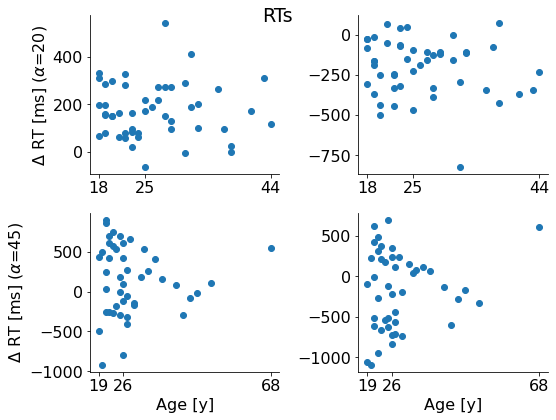

In [65]:
plt.figure(figsize=(8,6))

age = summary_a20.age.to_numpy()
plt.suptitle('RTs')
plt.subplot(221)
val = np.array(rt_congr_20)-np.array(rt_congr_tr_20)
plt.plot(age, val, 'o')
plt.xticks([min(age), np.median(age), max(age)])
plt.ylabel(r'$\Delta$ RT [ms] ($\alpha$=20)')
r,p = st.spearmanr(age, val)
print('RT: 20-con, r = {:.2f}, p = {:.2f}'.format(r,p) )
plt.subplot(222)
val = np.array(rt_incon_20)-np.array(rt_incon_tr_20)
plt.plot(age, val, 'o')
plt.xticks([min(age), np.median(age), max(age)])
r,p = st.spearmanr(age, val)
print('RT: 20-inc, r = {:.2f}, p = {:.2f}'.format(r,p) )

age = summary_a45.age.to_numpy()
plt.subplot(223)
val = np.array(rt_congr_45)-np.array(rt_congr_tr_45)
plt.plot(age, val, 'o')
plt.xticks([min(age), np.median(age), max(age)])
plt.xlabel('Age [y]')
plt.ylabel(r'$\Delta$ RT [ms] ($\alpha$=45)')
r,p = st.spearmanr(age, val)
print('RT: 45-con, r = {:.2f}, p = {:.2f}'.format(r,p) )
plt.subplot(224)
val = np.array(rt_incon_45)-np.array(rt_incon_tr_45)
plt.plot(age, val, 'o')
plt.xticks([min(age), np.median(age), max(age)])
plt.xlabel('Age [y]')
plt.tight_layout()
r,p = st.spearmanr(age, val)
print('RT: 45-inc, r = {:.2f}, p = {:.2f}'.format(r,p) )

ACC: 20-con, r = -0.28, p = 0.05
RT: 20-inc, r = 0.22, p = 0.13
ACC: 45-con, r = -0.05, p = 0.74
ACC: 45-inc, r = -0.23, p = 0.13


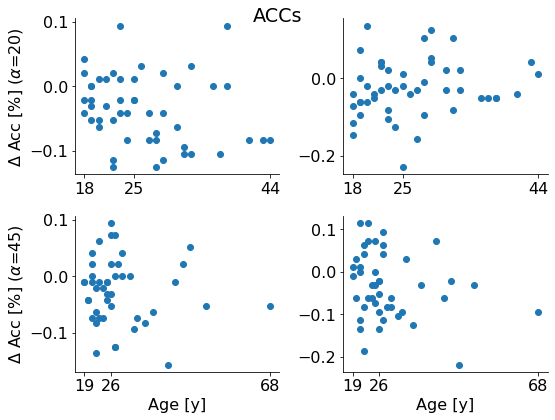

In [66]:
plt.figure(figsize=(8,6))

age = summary_a20.age.to_numpy()
plt.suptitle('ACCs')
plt.subplot(221)
val = np.array(correct_congr_20)-np.array(correct_congr_tr_20)
plt.plot(age, val, 'o')
plt.xticks([min(age), np.median(age), max(age)])
plt.ylabel(r'$\Delta$ Acc [%] ($\alpha$=20)')
r,p = st.spearmanr(age, val)
print('ACC: 20-con, r = {:.2f}, p = {:.2f}'.format(r,p) )
plt.subplot(222)
val = np.array(correct_incon_20)-np.array(correct_incon_tr_20)
plt.plot(age, val, 'o')
plt.xticks([min(age), np.median(age), max(age)])
r,p = st.spearmanr(age, val)
print('RT: 20-inc, r = {:.2f}, p = {:.2f}'.format(r,p) )

age = summary_a45.age.to_numpy()
plt.subplot(223)
val = np.array(correct_congr_45)-np.array(correct_congr_tr_45)
plt.plot(age, val, 'o')
plt.xticks([min(age), np.median(age), max(age)])
plt.xlabel('Age [y]')
plt.ylabel(r'$\Delta$ Acc [%] ($\alpha$=45)')
r,p = st.spearmanr(age, val)
print('ACC: 45-con, r = {:.2f}, p = {:.2f}'.format(r,p) )
plt.subplot(224)
val = np.array(correct_incon_45)-np.array(correct_incon_tr_45)
plt.plot(age, val, 'o')
plt.xticks([min(age), np.median(age), max(age)])
plt.xlabel('Age [y]')
plt.tight_layout()
r,p = st.spearmanr(age, val)
print('ACC: 45-inc, r = {:.2f}, p = {:.2f}'.format(r,p) )